# MAE

## import libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt

## dataset

In [30]:
data = np.genfromtxt('data_outlier.csv', delimiter=',')

areas = data[:, 0].tolist()
prices = data[:, 1].tolist()
N = len(x_data)
print(f'areas: {areas}')
print(f'prices: {prices}')
print(f'data_size: {N}')

areas: [6.7, 4.6, 3.5, 5.5, 4.0]
prices: [8.6, 5.9, 4.6, 6.7, 7.2]
data_size: 5


## functions

In [31]:
def predict(x, w, b):
    return x*w +b

def compute_loss(y_hat, y):
    return abs(y_hat - y)

def compute_gradient(y_hat, y, x):
    dw = x*(y_hat - y) / abs(y_hat - y)
    db = (y_hat - y) / abs(y_hat - y)
    return (dw, db)

def update_weights(w, b, dw, db, lr):
    w_new = w - lr*dw
    b_new= b - lr*db
    return (w_new, b_new)


## train and init weights

In [32]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameters
epoch_max = 20
losses = []

In [33]:
# train
for epoch in range(epoch_max):
    for i in range(N):
        x = x_data[i]
        y = y_data[i]

        #predict 
        y_hat = predict(x, w, b)
        # compute loss
        loss = compute_loss(y_hat, y)
        losses.append(loss)

        # compute gradients
        (dw, db) = compute_gradient(y_hat, y, x)

        # update weights
        (w, b) = update_weights(w, b, dw, db, lr)

print(w, b)

1.1820000000000006 0.34000000000000014


## visualization

In [34]:
w, b= 1.1820000000000006, 0.34000000000000014

Text(0, 0.5, 'prices')

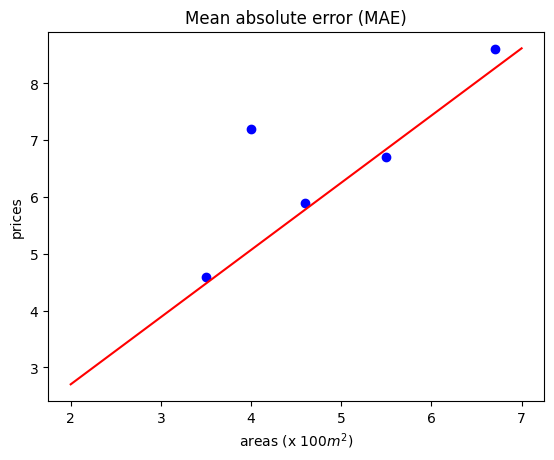

In [44]:
x_data = range(2,8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

plt.scatter(areas, prices, color = 'b')

#>>>>>>>>>>>>>>>>>>>>>>>>>
plt.title("Mean absolute error (MAE)")
plt.xlabel('areas (x 100$m^2$)')
plt.ylabel('prices')